In [1]:
import numpy as np
import path as Path
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.cosmology import FlatwCDM
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import LambdaCDM
from astropy.cosmology import wCDM
from astropy.cosmology import Flatw0waCDM
import scipy
from escape_functions_noastropy import *
from multiprocessing import Process
from multiprocessing import Queue
from multiprocessing import Pool
import emcee
import corner

In [2]:
cosmo = FlatwCDM(H0=70, Om0=0.2,w0=-1)
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1)
cosmo = FlatLambdaCDM(H0=70,Om0=0.2)
cosmo = LambdaCDM(H0=70, Om0=0.2, Ode0 = 0)
cosmo = Flatw0waCDM(H0=70, Om0=0.2, w0=-0.9, wa=0.2)

In [3]:
astroc.G.to( u.Mpc *  u.km**2 / u.s**2 / u.solMass).value #Mpc km2/s^2 kg

4.300917270069976e-09

In [4]:
z=0.2
M200 = 1e15*u.solMass
rho_crit = cosmo.critical_density(z)
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
print rho_crit
print rho_crit_z(z,[0.2,-0.9,0.2,0.7],'Flatw0waCDM')
cosmo = FlatLambdaCDM(H0=70,Om0=0.2,name='FlatLambdaCDM')
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
theta_array = radius_array /cosmo.angular_diameter_distance(z)
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
print R200crit

1.62994370205e+11 solMass / Mpc3
1.62994370205e+11 solMass / Mpc3
1.94194203988 Mpc


In [5]:
def cosmology(cosmology):
    case = cosmology.name
    if case == 'Flatw0waCDM':
        return [cosmology.Om0, cosmology.w0, cosmology.wa, cosmology.h]
    
    elif case == 'FlatwCDM':
        return [cosmology.Om0, cosmology.w0, cosmology.h]

    elif case == 'wCDM':
        return [cosmology.Om0, cosmology.Ode0, cosmology.w0,cosmology.h]
        
    elif case == 'LambdaCDM':
        return [cosmology.Om0, cosmology.Ode0, cosmology.h]

    elif case == 'FlatLambdaCDM':
        return [cosmology.Om0, cosmology.h]

In [6]:
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1,name = 'wCDM')
cosmology(cosmo)

[0.2, 0.8, -1.0, 0.7]

Mean fit (1e15) =  0.9982395285114913
M200 =  1e+15 solMass
R200 (sphere) =  1.97141172229 Mpc
Conc (Sereno) =  3.2041969809
n =  3.9924040270729604
sigma n =  0.035425850063980135
rho_0 =  3.513234669356727e+17
sigma_rho_0 =  5009458177993920.0
h =  0.00015851541579169618
sigma_h =  3.1703083158339235e-05


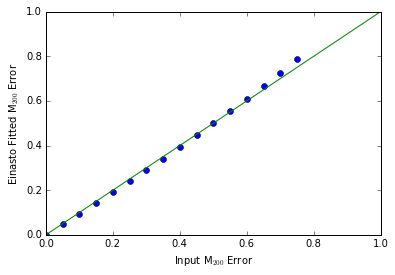

In [7]:
M200 = 1e15*u.solMass
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1,name = 'wCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
z = 0.2
theta_array = radius_array /D_A(z,cosmo_params, cosmo.name)
real_error = []
real_mean = []
corr_coef = 0.2
for i in range(16):
    M200,R200,conc, rho_0, h,n, sigma_rho_0, sigma_h,sigma_n =  einasto_nfwM200_errors(M200, np.float(i)/20.0, z,cosmo_params, cosmo.name)
    M200_einasto = 4*np.pi*integrate.quad(rho_einasto_int,0,R200.value,args=(rho_0,h,n))[0]
    M200_einasto_p = 4*np.pi*integrate.quad(rho_einasto_int,0,R200.value,args=(rho_0+sigma_rho_0, h+corr_coef*sigma_h, n+sigma_n ))[0]
    M200_einasto_m = 4*np.pi*integrate.quad(rho_einasto_int,0,R200.value,args=(rho_0-sigma_rho_0, h-corr_coef*sigma_h, n-sigma_n ))[0]
    real_error =  np.append(real_error,((1-M200_einasto_m) + (M200_einasto_p-1))/(2*M200_einasto))
    real_mean =  np.append(real_mean,M200_einasto)
plt.plot(np.arange(0,0.8,0.05),real_error,'o')
plt.plot([0,1],[0,1])
plt.xlabel('Input M$_{200}$ Error')
plt.ylabel('Einasto Fitted M$_{200}$ Error')
#Note the 0.7, which is given in Alejo's paper's appendix. We need it!
print 'Mean fit (1e15) = ', np.sum(real_mean)/16/1e15

M200,R200,conc,rho_0, h,n, sigma_rho_0, sigma_h,sigma_n =  einasto_nfwM200_errors(M200, 0.2, z,cosmo_params, cosmo.name)
print 'M200 = ', M200
print 'R200 (sphere) = ', R200
print 'Conc (Sereno) = ', conc
print 'n = ',n
print 'sigma n = ', sigma_n
print 'rho_0 = ',rho_0
print 'sigma_rho_0 = ', sigma_rho_0
print 'h = ', h
print 'sigma_h = ', corr_coef*h

Mean fit (1e15) =  0.5000000000000002
M200 =  5.0 solMass
R200 (sphere) =  1.56471052091 Mpc
Conc (Sereno) =  3.39629750846
rho_s/1e14 =  5.745170579479509
sigma rho_s/1e14 =  0.24892813462110125
r_s =  0.46071067596929743
sigma r_s =  0.03829814702511186


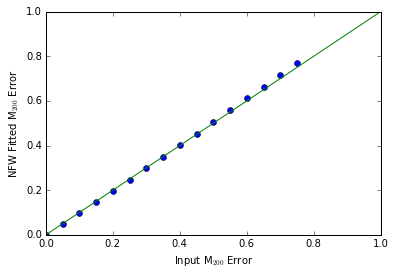

In [8]:
M200 = 5e14*u.solMass
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1,name = 'wCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,100).round(3)* u.Mpc #specify radius array for profiles. used in v_esc(r) funcs below.
z = 0.2
theta_array = radius_array /D_A(z,cosmo_params, cosmo.name)
real_error = []
real_mean = []
corr_coef = 0.85
for i in range(16):
    M200,R200,conc,rho_s, sigma_rho_s,r_s, sigma_r_s =  nfws_errors(M200, np.float(i)/20.0, z,cosmo_params, cosmo.name)
    M200_nfws = 4*np.pi*integrate.quad(rhos_nfw_int,0,R200.value,args=(rho_s, r_s))[0]
    M200_nfws_p = 4*np.pi*integrate.quad(rhos_nfw_int,0,R200.value,args=(rho_s+sigma_rho_s,r_s+corr_coef*sigma_r_s))[0]
    M200_nfws_m = 4*np.pi*integrate.quad(rhos_nfw_int,0,R200.value,args=(rho_s-sigma_rho_s,r_s-corr_coef*sigma_r_s))[0]
    real_error =  np.append(real_error,((1-M200_nfws_m) + (M200_nfws_p-1))/(2*M200_nfws))
    real_mean =  np.append(real_mean,M200_nfws)
plt.plot(np.arange(0,0.8,0.05),real_error,'o')
plt.plot([0,1],[0,1])
plt.xlabel('Input M$_{200}$ Error')
plt.ylabel('NFW Fitted M$_{200}$ Error')
#Note the 0.7, which is given in Alejo's paper's appendix. We need it!
print 'Mean fit (1e15) = ', np.sum(real_mean)/16/1e15
M200,R200,conc,rho_s, sigma_rho_s,r_s, sigma_r_s =  nfws_errors(M200, 0.2, z,cosmo_params, cosmo.name)

print 'M200 = ', M200/1e14
print 'R200 (sphere) = ', R200
print 'Conc (Sereno) = ', conc
print 'rho_s/1e14 = ' , rho_s/1e14
print 'sigma rho_s/1e14 = ' , sigma_rho_s/1e14
print 'r_s = ',r_s
print 'sigma r_s = ', sigma_r_s

In [9]:
G_newton = astroc.G.to( u.Mpc *  u.km**2 / u.s**2 / u.solMass).value #Mpc km2/s^2 kg
print G_newton, M200, cosmo_params, cosmo.name
print q_z_function(z, cosmo_params,cosmo.name)
print r_eq(0.2,M200,cosmo_params, cosmo.name)

4.30091727007e-09 5e+14 solMass [0.2, 0.8, -1.0, 0.7] wCDM
-0.547486033519553
8.87788784963 Mpc


In [10]:
cosmo = FlatLambdaCDM(H0=70,Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,100).round(3) *u.Mpc #specify radius array for profiles. used in v_esc(r) funcs below.
z = 0.2
theta_array = radius_array /D_A(z,cosmo_params, cosmo.name)
r,phi0 = v_esc_einasto(theta_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(radius_array,(phi0-phi0)/phi0*1.0,'k',label=r'$\Omega_m$=0.2')
cosmo = FlatLambdaCDM(H0=70,Om0=0.3,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
r,phi = v_esc_einasto(theta_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(radius_array,(phi-phi0)/phi0*1.0,'r', label=r'$\Omega_m$=0.3')
cosmo = FlatwCDM(H0=70,Om0=0.2,w0=-1.5,name = 'FlatwCDM')
cosmo_params = cosmology(cosmo)
r,phi = v_esc_einasto(theta_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(radius_array,(phi-phi0)/phi0*1.0,'k-.',label=r'$\Omega_m$=0.2, w = -1.5')
cosmo = FlatwCDM(H0=70,Om0=0.2,w0=-0.5,name = 'FlatwCDM')
cosmo_params = cosmology(cosmo)
r,phi = v_esc_einasto(theta_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(radius_array,(phi-phi0)/phi0*1.0,'k--',label=r'$\Omega_m$=0.2, w = -0.5')
plt.legend(loc=0)
plt.xlim(0.3,2)
plt.ylim(-0.25,0.25)
plt.ylabel(r'$\frac{\rm{v}_{esc}-\rm{v}_{esc}^{fid}}{\rm{v}_{esc}^{fid}}$',fontsize=24)
plt.xlabel('r (Mpc)', fontsize=20)
plt.title(r'Galaxy cluster $v_{escape}$ profile',fontsize=20)
plt.show()
print 'At z = ', z

At z =  0.2


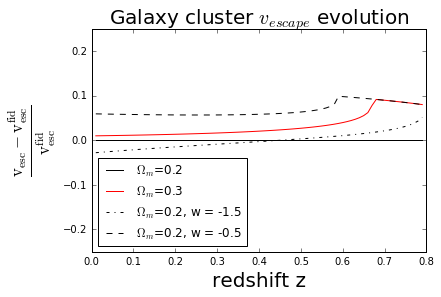

At r =  0.9010000000000001


In [11]:
cosmo = FlatLambdaCDM(H0=70,Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
z= np.arange(0.01, 0.8, 0.01)
rrr = 1.5
vesc_z0 = []
radius_use = 35
for i in range(len(z)):
    theta_array = radius_array /D_A(z[i],cosmo_params, cosmo.name).value
    r,vesc = v_esc_einasto(theta_array,z[i],rho_0,h,n,100,cosmo_params, cosmo.name)
    vesc_z0 = np.append(vesc_z0,vesc[radius_use])
plt.plot(z,(vesc_z0-vesc_z0)/vesc_z0*1.0,'k',label=r'$\Omega_m$=0.2')
cosmo = FlatLambdaCDM(H0=70,Om0=0.3,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
vesc_z = []
for i in range(len(z)):
    theta_array = radius_array /D_A(z[i],cosmo_params, cosmo.name).value
    r,vesc = v_esc_einasto(theta_array,z[i],rho_0,h,n,100,cosmo_params, cosmo.name)
    vesc_z = np.append(vesc_z,vesc[radius_use])
plt.plot(z,(vesc_z-vesc_z0)/vesc_z0*1.0,'r', label=r'$\Omega_m$=0.3')
vesc_z = []
cosmo = FlatwCDM(H0=70,Om0=0.2,w0=-1.5,name = 'FlatwCDM')
cosmo_params = cosmology(cosmo)
for i in range(len(z)):
    theta_array = radius_array /D_A(z[i],cosmo_params, cosmo.name).value
    r,vesc = v_esc_einasto(theta_array,z[i],rho_0,h,n,100,cosmo_params, cosmo.name)
    vesc_z = np.append(vesc_z,vesc[radius_use])
plt.plot(z,(vesc_z-vesc_z0)/vesc_z0*1.0,'k-.',label=r'$\Omega_m$=0.2, w = -1.5')
vesc_z = []
cosmo = FlatwCDM(H0=70,Om0=0.2,w0=-0.5,name = 'FlatwCDM')
cosmo_params = cosmology(cosmo)
for i in range(len(z)):
    theta_array = radius_array /D_A(z[i],cosmo_params, cosmo.name).value
    r,vesc = v_esc_einasto(theta_array,z[i],rho_0,h,n,100,cosmo_params, cosmo.name)
    vesc_z = np.append(vesc_z,vesc[radius_use])
plt.plot(z,(vesc_z-vesc_z0)/vesc_z0*1.0,'k--',label=r'$\Omega_m$=0.2, w = -0.5')
plt.legend(loc=0)
plt.xlim(0,0.8)
plt.ylim(-0.25,0.25)
plt.ylabel(r'$\frac{\rm{v}_{esc}-\rm{v}_{esc}^{fid}}{\rm{v}_{esc}^{fid}}$',fontsize=24)
plt.xlabel('redshift z', fontsize=20)
plt.title(r'Galaxy cluster $v_{escape}$ evolution',fontsize=20)
plt.show()
print 'At r = ',r[radius_use]


[0.00043418 0.00070771 0.00098124 0.00125477 0.0015283  0.00180038
 0.00207391 0.00234744 0.00262097 0.0028945 ]
[2661.86497274 2379.93520409 2390.03687059 2196.60216274 2168.98369714
 1926.19982483 1916.21976072 1747.79178429 1723.04528475 1604.23488221]
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


<Container object of 3 artists>

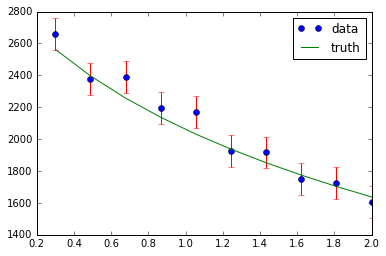

In [12]:
radial_bins = 10
error_kms = 100
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1,name = 'wCDM')
cosmo_params = cosmology(cosmo)
radius_array = np.linspace(0.3,2.0,radial_bins).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
z = 0.2
theta_data_array = radius_array /D_A(z, cosmo_params, cosmo.name).value
xdata = theta_data_array
#d_alpha = np.random.normal(alpha,sigma_alpha)
#d_r_2 = np.random.normal(r_2,sigma_r_2)
#d_rho_2 = np.random.normal(rho_2*1e14,sigma_rho_2)/1e14
r,ydata = v_esc_einasto(theta_data_array,z,rho_0,h,n,100,cosmo_params, cosmo.name) + np.random.normal(0,error_kms,size=radial_bins) 
ydata_err = np.zeros(len(ydata)) + error_kms
print xdata
print ydata
print ydata_err
r,truth = v_esc_einasto(theta_data_array,z,rho_0,h,n,100,cosmo_params, cosmo.name)
plt.plot(r,ydata, 'o', linestyle='None',label = 'data')
plt.plot(r, truth, '-', label = 'truth')
plt.legend()
plt.errorbar(r,ydata,yerr=ydata_err, linestyle='None')

In [13]:
def lnprior(theta):
    M200 = theta
    if not(1e13 < M200 < 1e17 ):
          return -np.inf
    return 0.0

In [18]:
def lnlike(theta, x, y, yerr): 
    p_theta_array = x
    p_z = 0.1
    p_M200 = theta[0]
    p_N = 100
    p_Omega_M = cosmo_params[0]
    p_little_h = cosmo_params[1]
#    print p_theta_array,p_z,p_alpha,p_rho_2,p_r_2,p_Zv,p_Omega_M,p_little_h,p_w
    model = v_esc_NFW_M200(p_theta_array,p_z,p_M200,p_N,[p_Omega_M,p_little_h],'FlatLambdaCDM')
    ymodel = np.interp(x,radius_array,model)
#    print model
    inv_sigma2 = 1.0/(yerr**2)
    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-ymodel)**2*inv_sigma2)))

In [19]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    ll = lnlike(theta, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(theta, x, y, yerr,cosmo)

In [20]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.2,name = 'FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
ndim, nwalkers, nsteps = 1, 500, 10000
p0 = np.transpose([np.random.uniform(1,10000,size=nwalkers)*1e13])#print np.shape(p0)

In [21]:
pool = Pool(processes=1)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(xdata, ydata, ydata_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

emcee: Exception while calling your likelihood function:
  params: [2.09195678e+16]
  args: (array([0.00043418, 0.00070771, 0.00098124, 0.00125477, 0.0015283 ,
       0.00180038, 0.00207391, 0.00234744, 0.00262097, 0.0028945 ]), array([2661.86497274, 2379.93520409, 2390.03687059, 2196.60216274,
       2168.98369714, 1926.19982483, 1916.21976072, 1747.79178429,
       1723.04528475, 1604.23488221]), array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]))
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "build/bdist.linux-x86_64/egg/emcee/ensemble.py", line 499, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-19-2fdacb0128bb>", line 3, in lnprob
    ll = lnlike(theta, x, y, yerr)
  File "<ipython-input-18-e2f8b7e47d63>", line 10, in lnlike
    ymodel = np.interp(x,radius_array,model)
  File "/u/home/christoq/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1308, in interp
    return interp_func(x, xp, fp, left, right)
ValueError: object too deep for desired array


emcee: Exception while calling your likelihood function:
  kwargs: {}
  params: [6.17356712e+16]
  args: (array([0.00043418, 0.00070771, 0.00098124, 0.00125477, 0.0015283 ,
       0.00180038, 0.00207391, 0.00234744, 0.00262097, 0.0028945 ]), array([2661.86497274, 2379.93520409, 2390.03687059, 2196.60216274,
       2168.98369714, 1926.19982483, 1916.21976072, 1747.79178429,
       1723.04528475, 1604.23488221]), array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]))
  exception:


  File "/u/home/christoq/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1308, in interp
Traceback (most recent call last):
  File "build/bdist.linux-x86_64/egg/emcee/ensemble.py", line 499, in __call__
    return self.f(x, *self.args, **self.kwargs)


ValueError: object too deep for desired array

  File "<ipython-input-19-2fdacb0128bb>", line 3, in lnprob
    ll = lnlike(theta, x, y, yerr)
  File "<ipython-input-18-e2f8b7e47d63>", line 10, in lnlike
    ymodel = np.interp(x,radius_array,model)
    return interp_func(x, xp, fp, left, right)
ValueError: object too deep for desired array


emcee: Exception while calling your likelihood function:
  params: [6.31545247e+16]
  args: (array([0.00043418, 0.00070771, 0.00098124, 0.00125477, 0.0015283 ,
       0.00180038, 0.00207391, 0.00234744, 0.00262097, 0.0028945 ]), array([2661.86497274, 2379.93520409, 2390.03687059, 2196.60216274,
       2168.98369714, 1926.19982483, 1916.21976072, 1747.79178429,
       1723.04528475, 1604.23488221]), array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]))
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "build/bdist.linux-x86_64/egg/emcee/ensemble.py", line 499, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-19-2fdacb0128bb>", line 3, in lnprob
    ll = lnlike(theta, x, y, yerr)
  File "<ipython-input-18-e2f8b7e47d63>", line 10, in lnlike
    ymodel = np.interp(x,radius_array,model)
  File "/u/home/christoq/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1308, in interp
    return interp_func(x, xp, fp, left, right)
ValueError: object too deep for desired array


emcee: Exception while calling your likelihood function:
  params: [8.21728525e+16]
  args: (array([0.00043418, 0.00070771, 0.00098124, 0.00125477, 0.0015283 ,
       0.00180038, 0.00207391, 0.00234744, 0.00262097, 0.0028945 ]), array([2661.86497274, 2379.93520409, 2390.03687059, 2196.60216274,
       2168.98369714, 1926.19982483, 1916.21976072, 1747.79178429,
       1723.04528475, 1604.23488221]), array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]))
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "build/bdist.linux-x86_64/egg/emcee/ensemble.py", line 499, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-19-2fdacb0128bb>", line 3, in lnprob
    ll = lnlike(theta, x, y, yerr)
  File "<ipython-input-18-e2f8b7e47d63>", line 10, in lnlike
    ymodel = np.interp(x,radius_array,model)
  File "/u/home/christoq/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1308, in interp
    return interp_func(x, xp, fp, left, right)
ValueError: object too deep for desired array
